In [2]:
from langgraph.graph import StateGraph,START,END
from IPython.display import Image
from typing import TypedDict,Literal

In [3]:
class QuardaticEquation(TypedDict):
    a : float
    b : float
    c : float

    root1:float
    root2 : float
    result : str
    discriminant : float

In [4]:
def discriminant(state : QuardaticEquation) -> QuardaticEquation:
    a = state['a']
    b = state['b']
    c = state['c']

    disc = b**2 - 4*a*c
     
    return {'discriminant' : disc}


In [5]:


def real_roots(state: QuardaticEquation):

    root1 = (-state["b"] + state["discriminant"]**0.5)/(2*state["a"])
    root2 = (-state["b"] - state["discriminant"]**0.5)/(2*state["a"])

    result = f'The roots are {root1} and {root2}'

    return {'result': result}

def repeated_roots(state: QuardaticEquation):

    root = (-state["b"])/(2*state["a"])

    result = f'Only repeating root is {root}'

    return {'result': result}

In [6]:
def no_real_roots(state: QuardaticEquation):

    result = f'No real roots'

    return {'result': result}

In [7]:
def check_condition(state :  QuardaticEquation) -> Literal["real_roots_node", "repeated_roots_node", "no_real_roots_node"]:
    if state['discriminant'] > 0:
        return "real_roots_node"
    elif state['discriminant'] == 0:
        return "repeated_roots_node"
    else:
        return "no_real_roots_node"

In [8]:
graph = StateGraph(QuardaticEquation)

graph.add_node('real_roots_node',real_roots)
graph.add_node('repeated_roots_node',repeated_roots)
graph.add_node('no_real_roots_node',no_real_roots)

graph.add_node('discriminant_node',discriminant)

graph.add_edge(START,'discriminant_node')

graph.add_conditional_edges('discriminant_node', check_condition)
graph.add_edge('real_roots_node', END)
graph.add_edge('repeated_roots_node', END)
graph.add_edge('no_real_roots_node',END)

In [9]:
workflow = graph.compile()

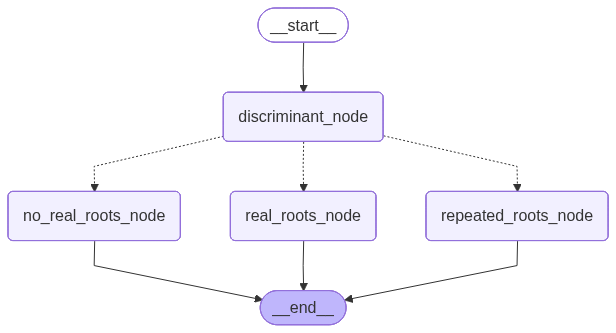

In [10]:
workflow

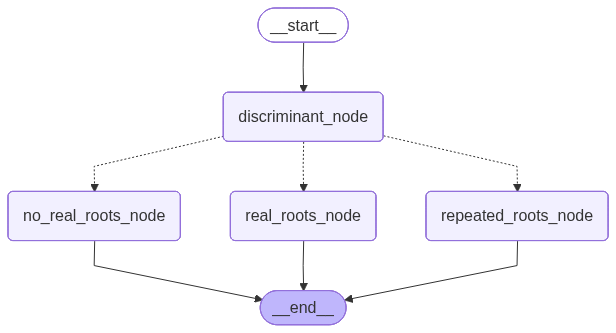

In [11]:
Image(workflow.get_graph().draw_mermaid_png())

In [12]:
initial_state ={'a':1,'b':-3,'c':2}

In [13]:
final_state =workflow.invoke(initial_state)

In [14]:
final_state

{'a': 1,
 'b': -3,
 'c': 2,
 'result': 'The roots are 2.0 and 1.0',
 'discriminant': 1}